In [1]:
include("./src/eda.jl")

quality_boxplot (generic function with 1 method)

In [2]:
region = "Japan"
catalog = "jma"

"jma"

In [3]:
df = load_data(region, catalog)

5×6 DataFrame
 Row │ Datetime                 Latitude  Longitude  Depth    Magnitude  Magnitude_type 
     │ DateTime                 Float64   Float64    Float64  Float64    String1        
─────┼──────────────────────────────────────────────────────────────────────────────────
   1 │ 1983-01-01T00:36:05.840   33.0778    139.035     0.21        3.9  V
   2 │ 1983-01-01T00:44:03.730   33.0892    139.042     0.0         3.2  V
   3 │ 1983-01-01T01:05:05.160   33.0918    139.044     0.17        3.7  V
   4 │ 1983-01-01T01:18:05.400   33.078     139.041     0.16        2.8  V
   5 │ 1983-01-01T01:21:05.440   33.0798    139.034     0.09        2.9  V6×7 DataFrame
 Row │ variable        mean     min                      median                   max                      nmissing  eltype   
     │ Symbol          Union…   Any                      Any                      Any                      Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────

Row,Datetime,Latitude,Longitude,Depth,Magnitude,Magnitude_type
,DateTime,Float64,Float64,Float64,Float64,String1
1,1983-01-01T00:36:05.840,33.0778,139.035,0.21,3.9,V
2,1983-01-01T00:44:03.730,33.0892,139.042,0.0,3.2,V
3,1983-01-01T01:05:05.160,33.0918,139.044,0.17,3.7,V
4,1983-01-01T01:18:05.400,33.078,139.041,0.16,2.8,V
5,1983-01-01T01:21:05.440,33.0798,139.034,0.09,2.9,V
6,1983-01-01T01:26:02.630,33.0773,139.042,0.2,3.4,V
7,1983-01-01T01:36:02.660,33.0778,139.044,0.3,3.0,V
8,1983-01-01T01:47:04.750,33.0785,139.033,0.11,2.6,V
9,1983-01-01T01:51:04.830,33.0763,139.039,0.15,3.0,V


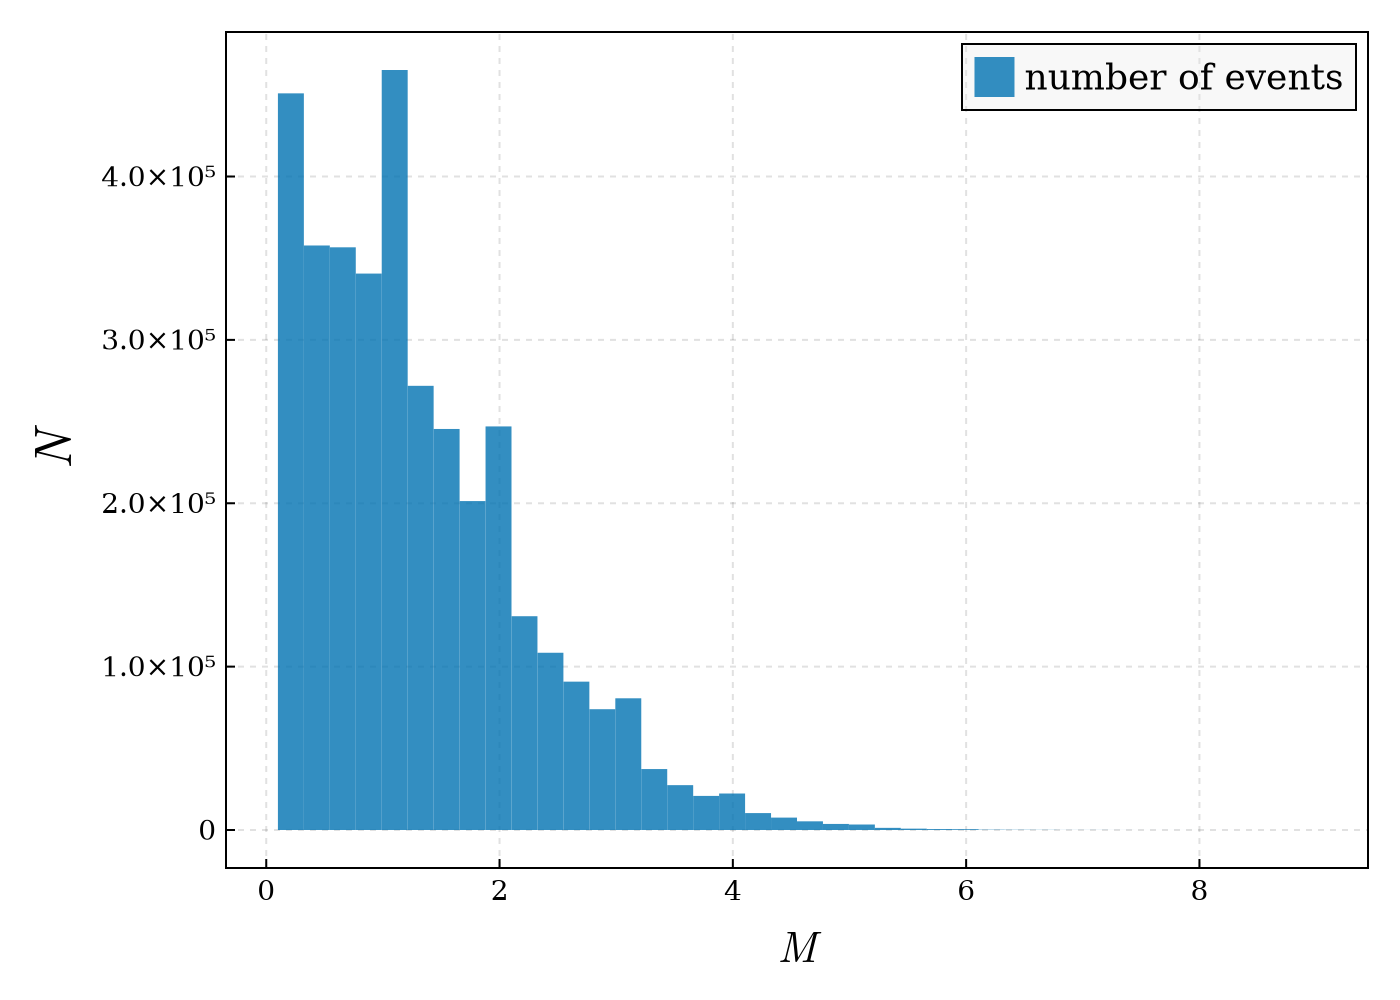

In [4]:
events_histogram_fig = events_histogram(df, region)

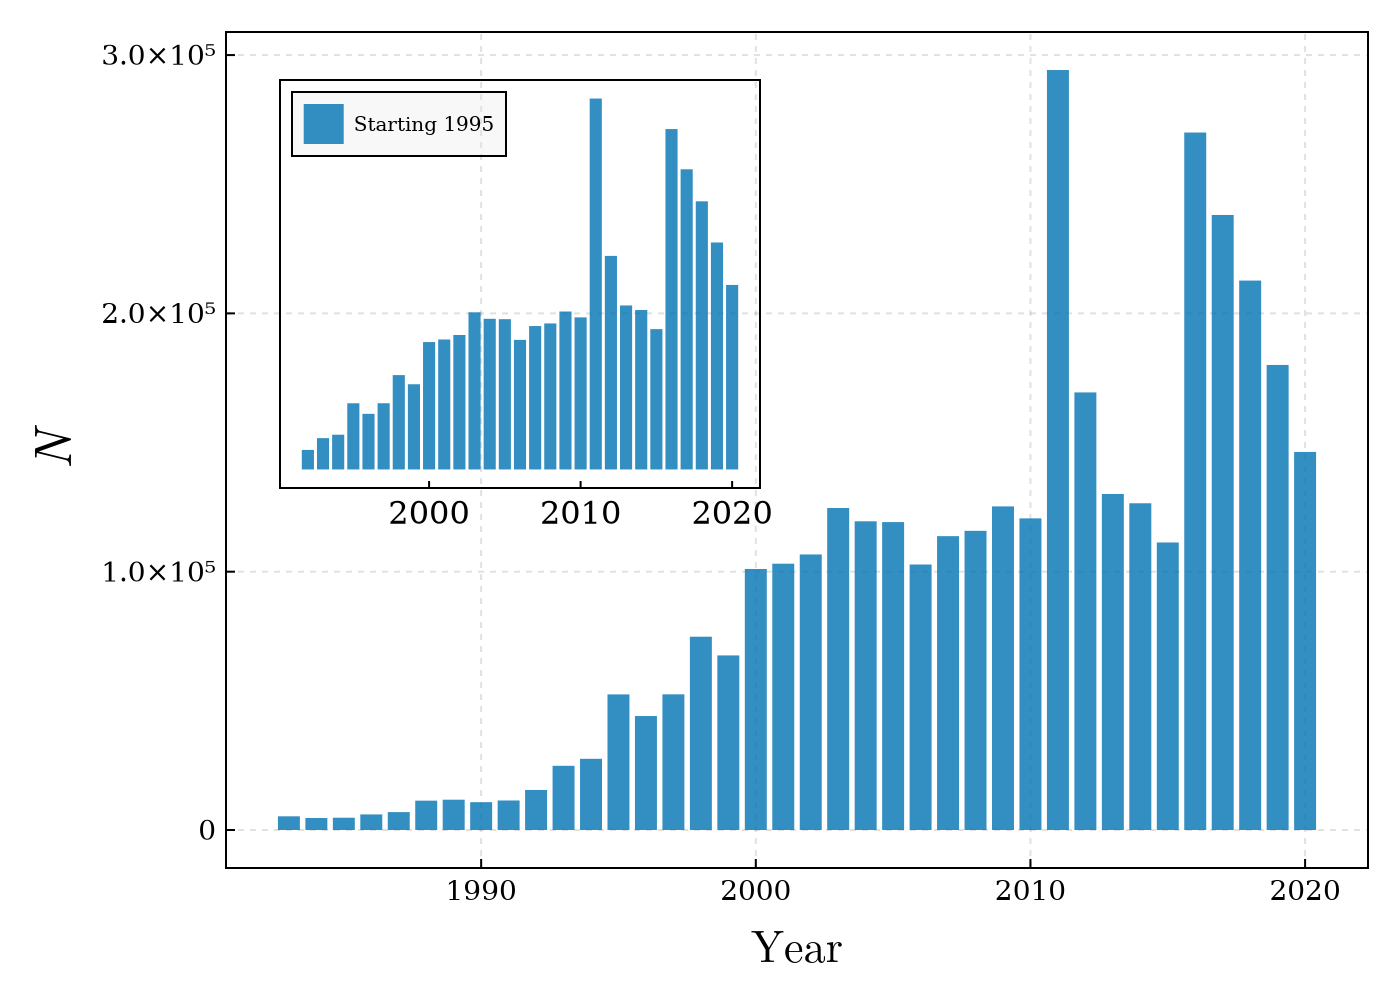

In [10]:
trim_year = year(minimum(df.Datetime))
explore_trim_year = 1995
magnitude_threshold=0.0

df_counted = join_on_counted_no_mag_bounds(df,trim_year,magnitude_threshold)
set_theme!(Theme(fonts=(; regular="CMU Serif")))
fig = Figure(size = (700, 500), font= "CMU Serif",) ## probably you need to install this font in your system


ax1 = Axis(fig[1, 1], xlabel = L"\mathrm{Year}", ylabel = L"N", ylabelsize = 26,
xlabelsize = 22, xgridstyle = :dash, ygridstyle = :dash, xtickalign = 1,
xticksize = 5, ytickalign = 1, yticksize = 5 , xlabelpadding = 10, ylabelpadding = 10)

########################################## TRUNCATED
ax2 = Axis(fig, bbox = BBox(140,380,256,460), xgridvisible = false, ygridvisible = false, xtickalign = 1,
xticksize = 4, ytickalign = 1, yticksize = 4, xticklabelsize=16, yticklabelsize=16, backgroundcolor=:white)

barplot!(ax1, df_counted.Year, df_counted.count)

barplot!(ax2, df_counted.Year[end-(2023-explore_trim_year):end], df_counted.count[end-(2023-explore_trim_year):end], label="Starting $(explore_trim_year)")
hideydecorations!(ax2)

axislegend(ax2, position = :lt, backgroundcolor = (:grey90, 0.25), labelsize=10);

save("./eda_results/$region/$(region)_events_per_year.png",fig, px_per_unit=5)
fig


# df_trimmed = explore_timespan(df, region, trim_year, explore_trim_year; magnitude_threshold=0.0)

In [7]:
if "Magnitude_Type" in names(df)
    df_mag_type_count = magtype_boxplot(df, region, mag_type_descriptions=[])
end

if "Quality" in names(df)
    df_quality_count = quality_boxplot(df, region)
end

In [9]:
# Write to CSV
# CSV.write("./data/$(region).csv", df_trimmed)